In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap
import numpy as np

from MOBPY.MOB import MOB
from MOBPY.plot.MOB_PLOT import MOB_PLOT

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

## Import Data and create training and testing datasets

In [27]:
credit_data = pd.read_csv('Data/cs-training.csv', index_col=0)

In [28]:
 credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [29]:
credit_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [8]:
credit_data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [9]:
print('No Serious Delinquencies', round(credit_data['SeriousDlqin2yrs'].value_counts()[0]/len(credit_data) * 100,2), '% of the dataset')
print('Serious Delinquencies', round(credit_data['SeriousDlqin2yrs'].value_counts()[1]/len(credit_data) * 100,2), '% of the dataset')

No Serious Delinquencies 93.32 % of the dataset
Serious Delinquencies 6.68 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Serious Delinquencies || 1: Serious Delinquencies)')

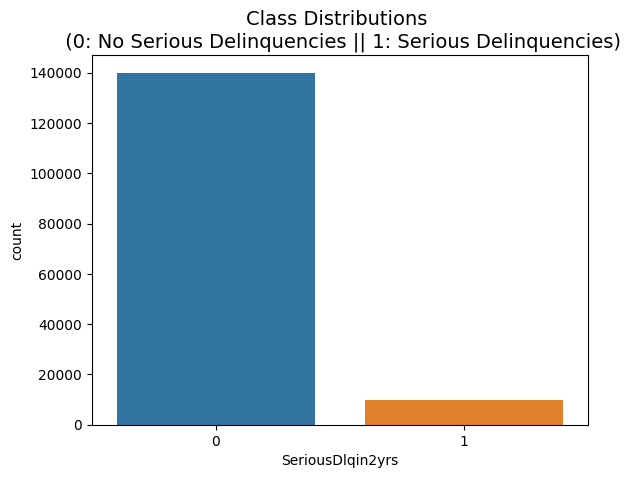

In [10]:
sns.countplot(x='SeriousDlqin2yrs', data=credit_data)
plt.title('Class Distributions \n (0: No Serious Delinquencies || 1: Serious Delinquencies)', fontsize=14)

In [11]:
credit_data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

## Exploratory Data Analysis

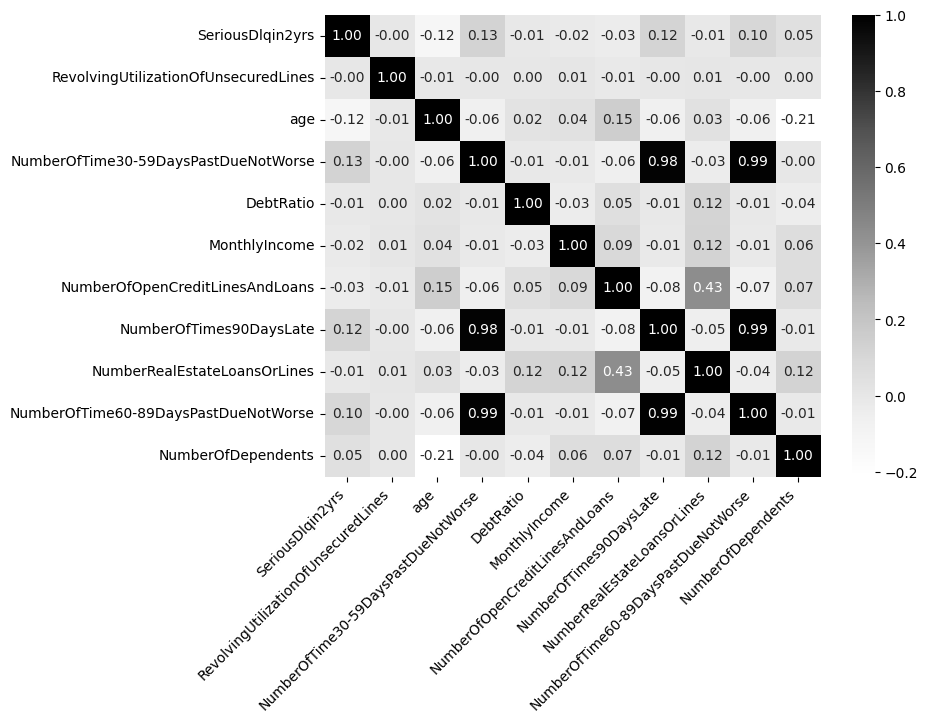

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(credit_data.corr(), annot=True, cmap="Greys", fmt=".2f", cbar=True)
plt.xticks(rotation=45, ha='right') 
plt.show()

In [13]:
sampled_data = credit_data.sample(n=1000, random_state=42)

<Figure size 1500x1000 with 0 Axes>

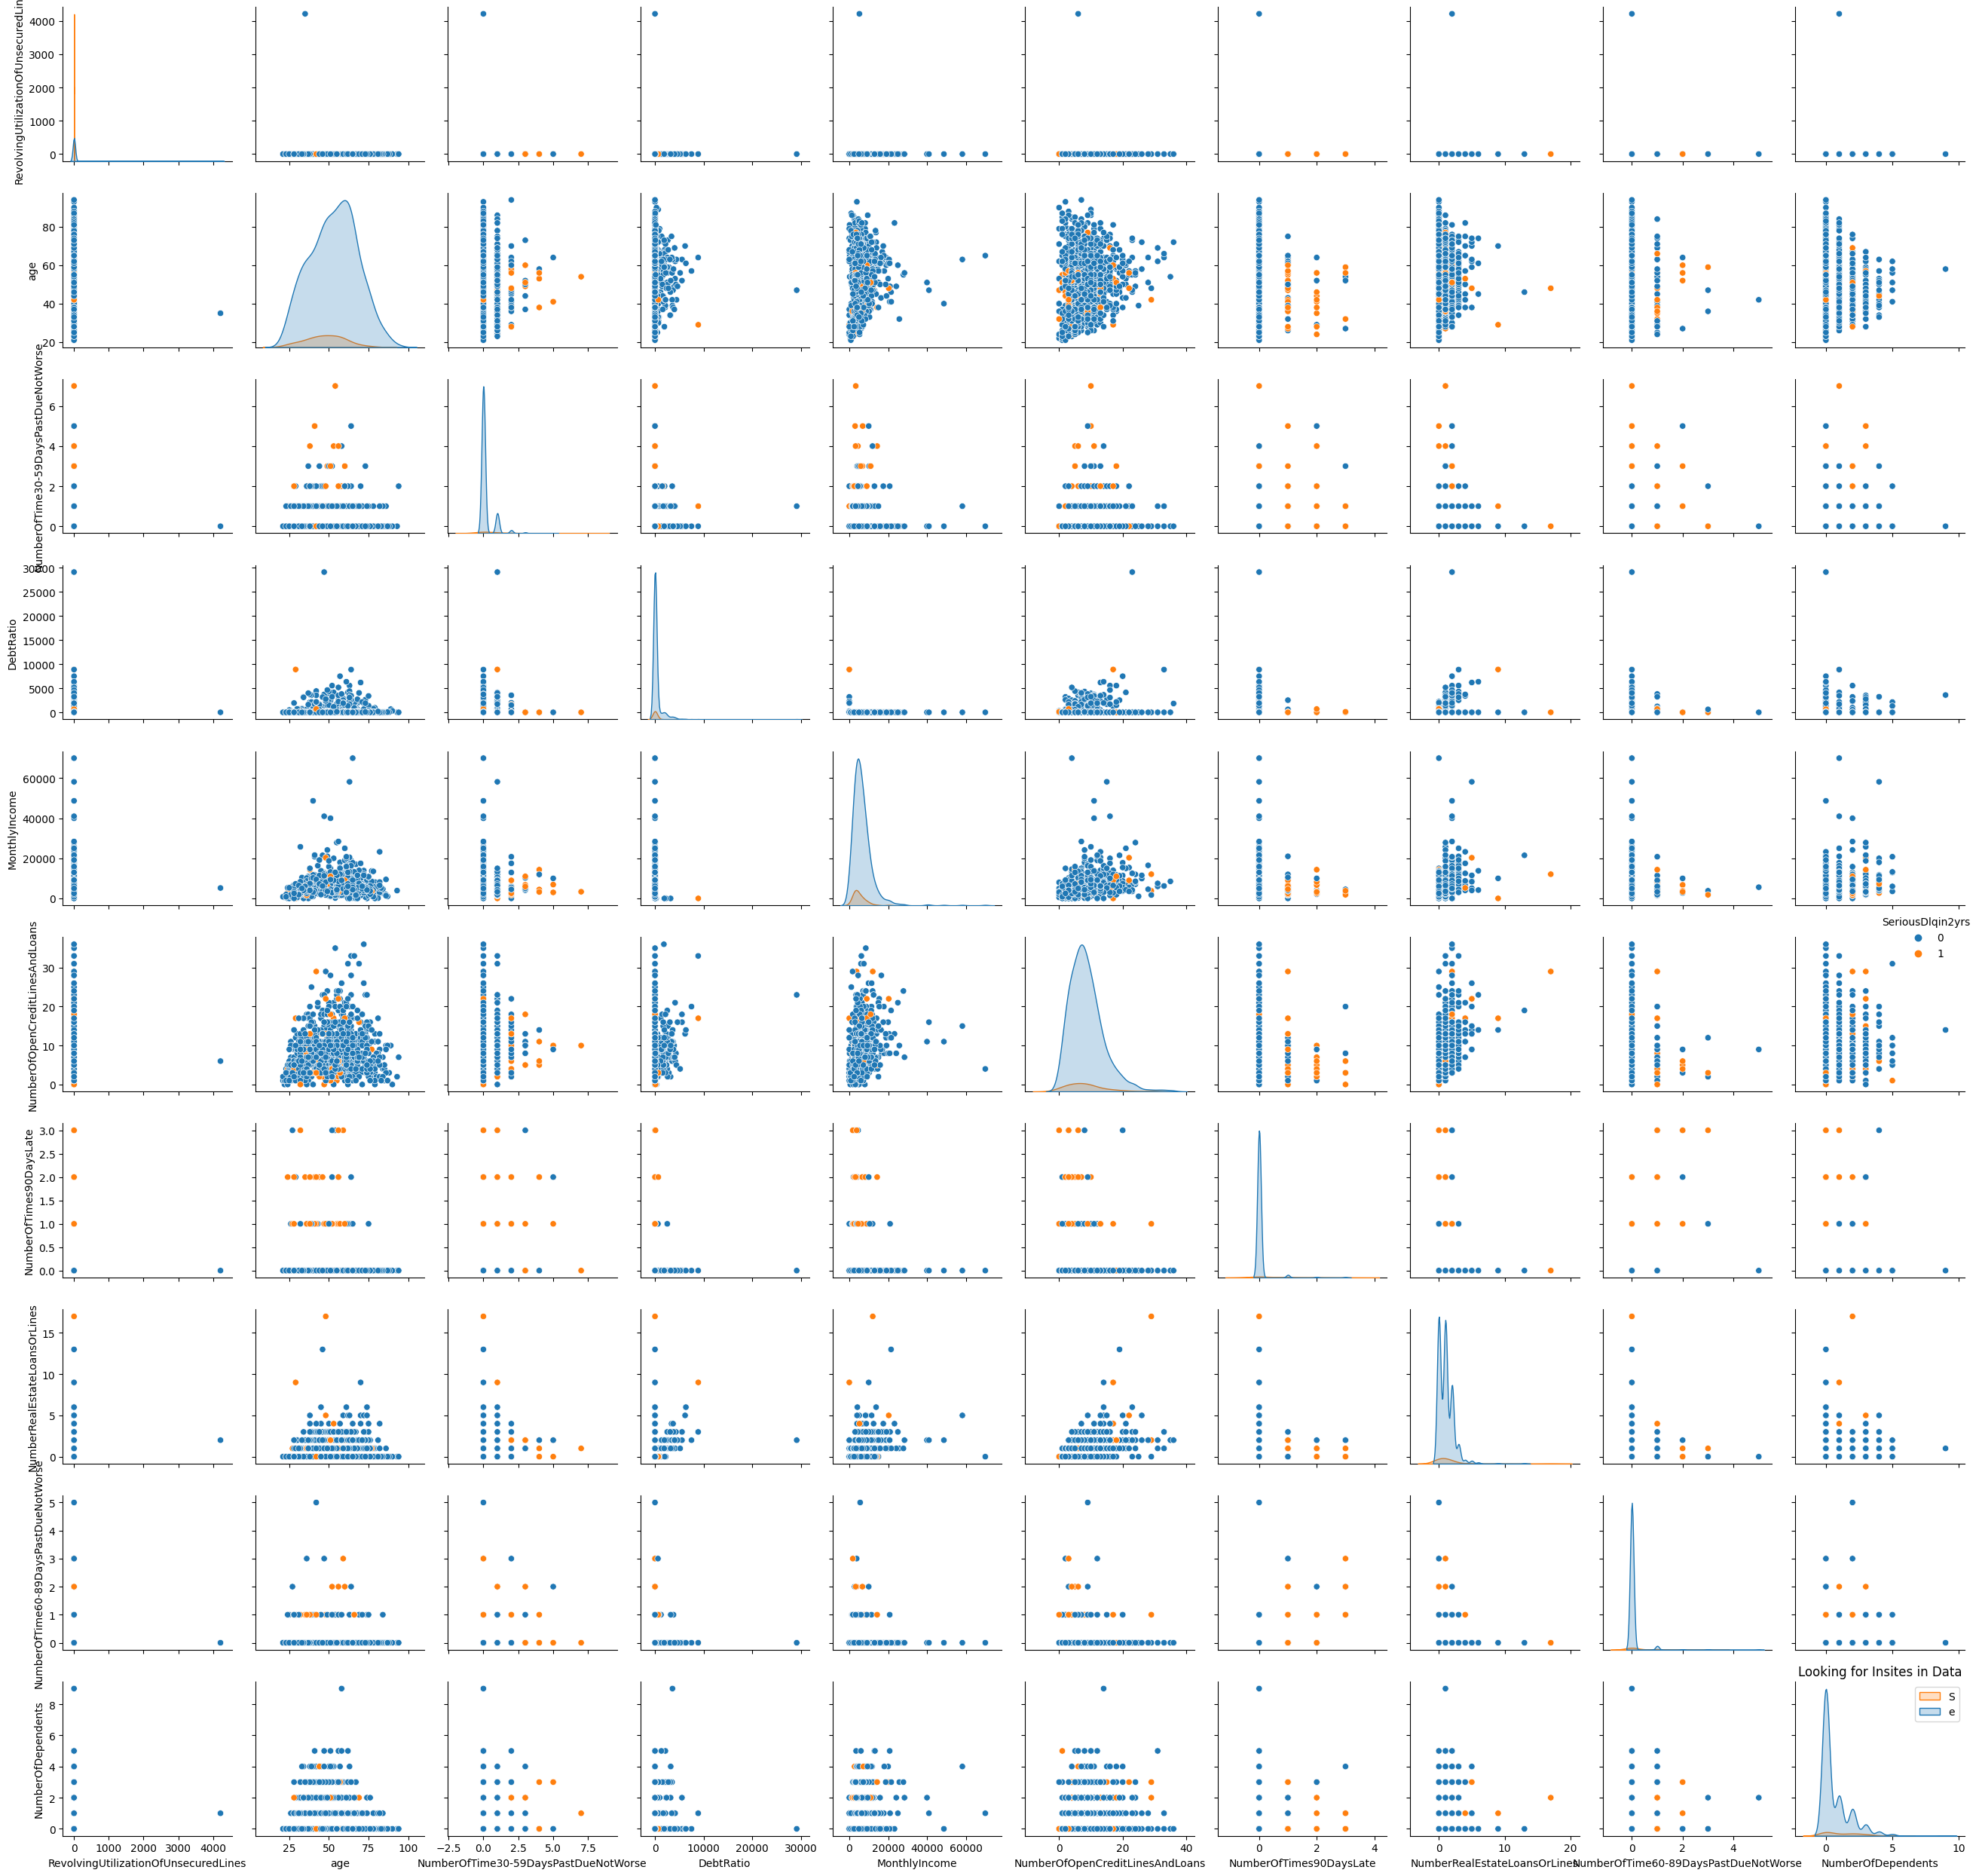

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(sampled_data,hue="SeriousDlqin2yrs")
plt.title("Looking for Insites in Data")
plt.tight_layout()
plt.legend("SeriousDlqin2yrs")



## Outliersdf.info()

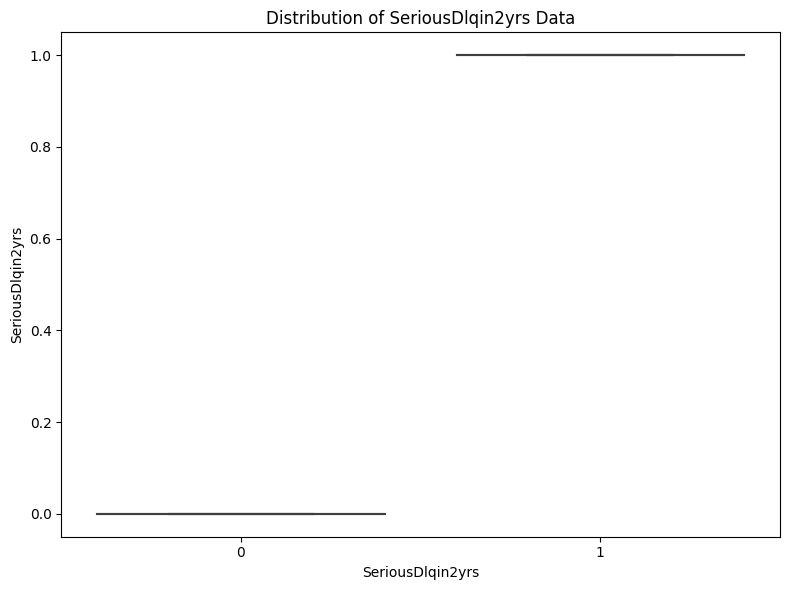

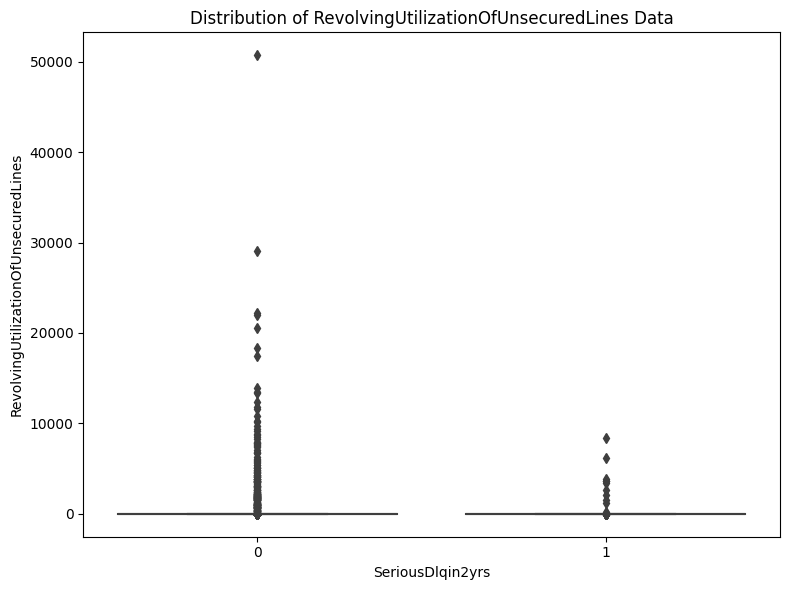

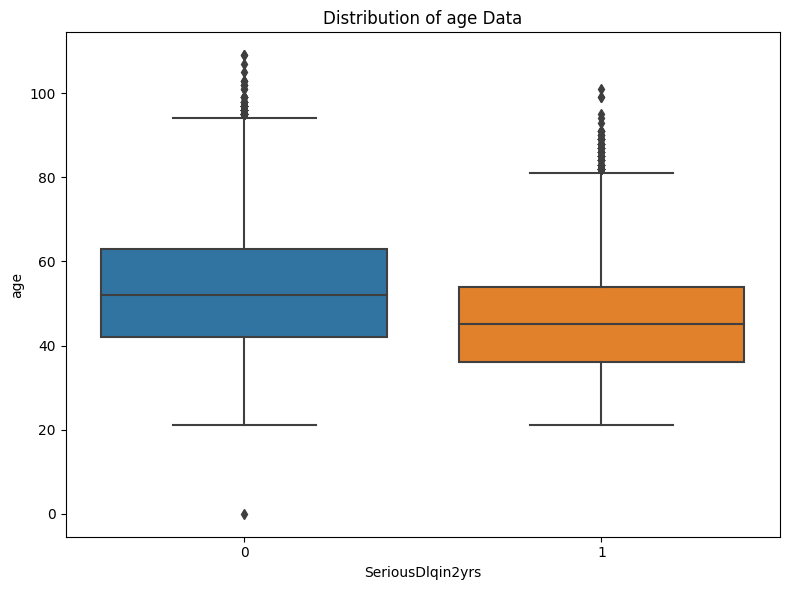

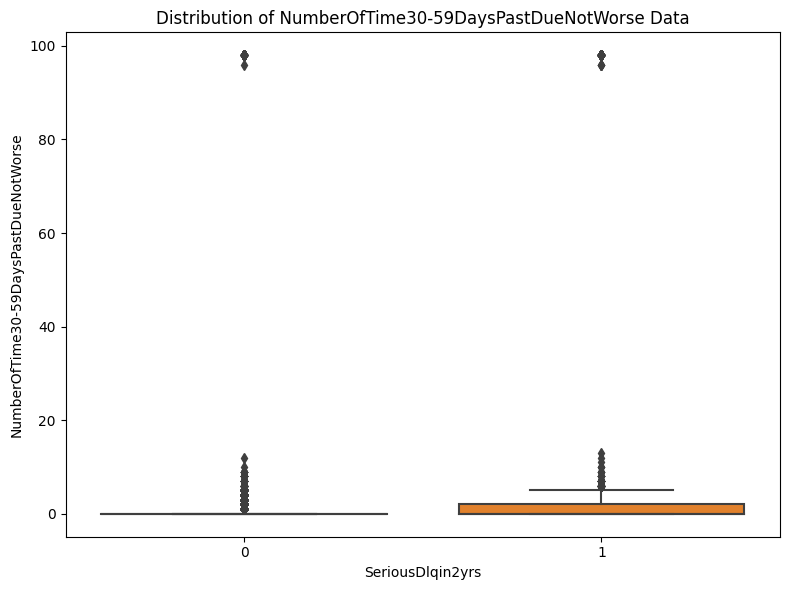

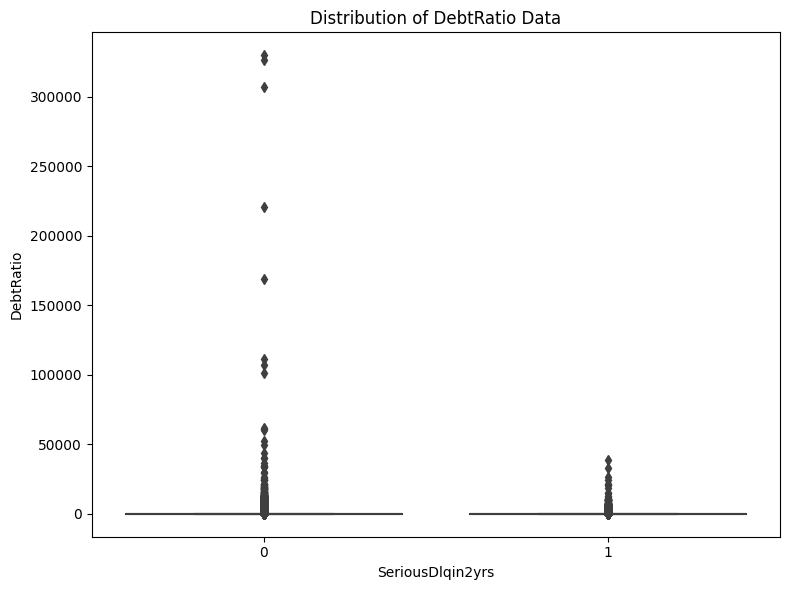

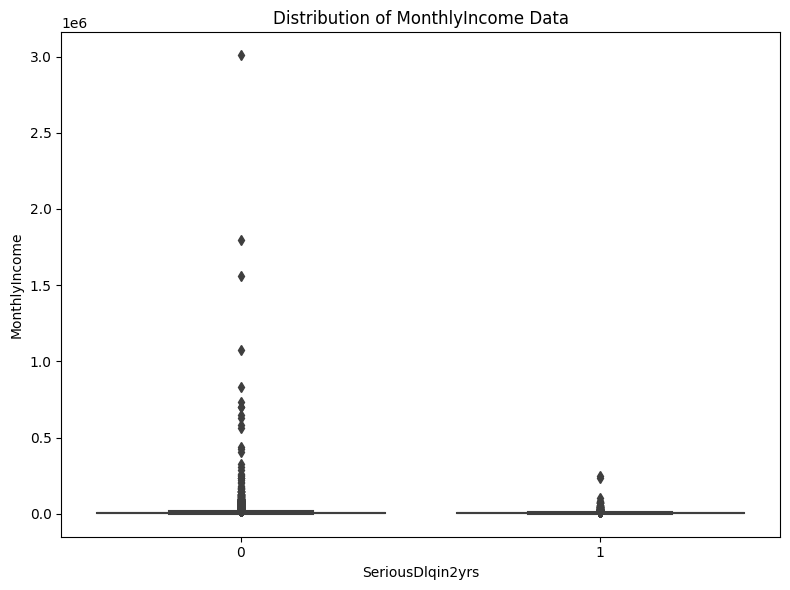

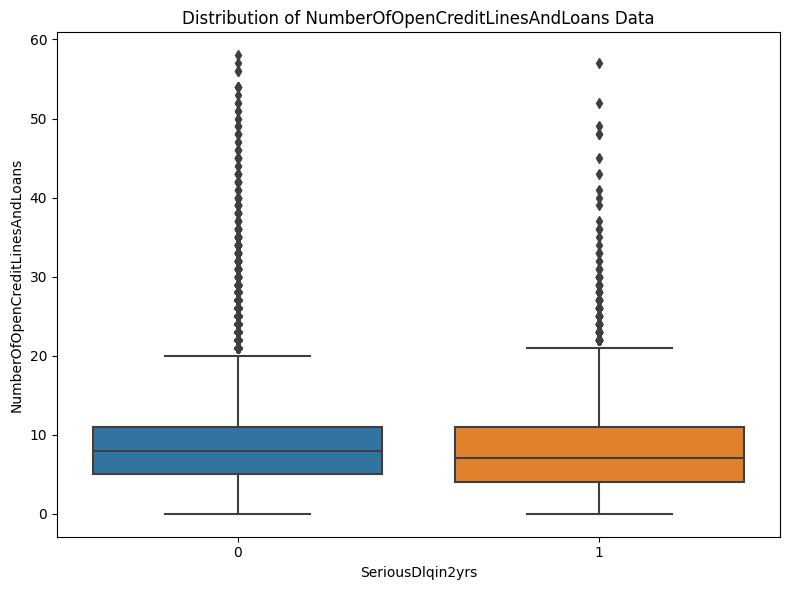

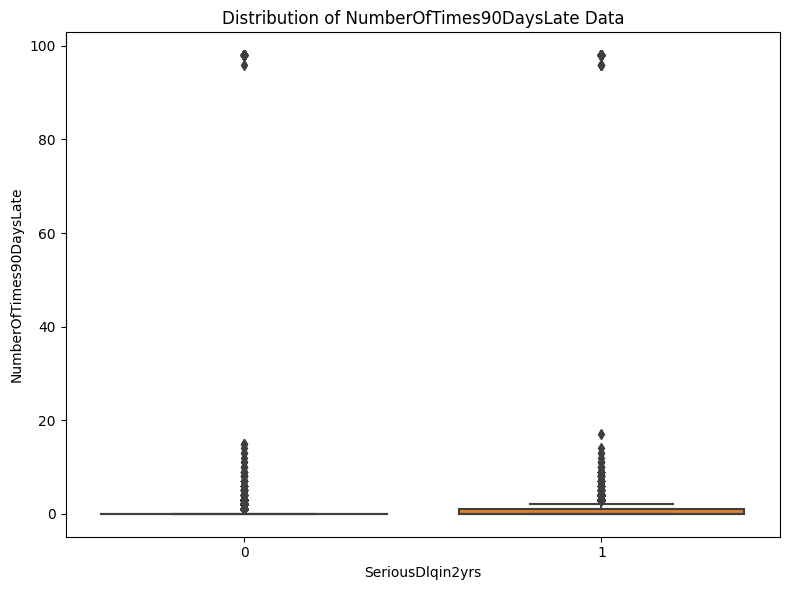

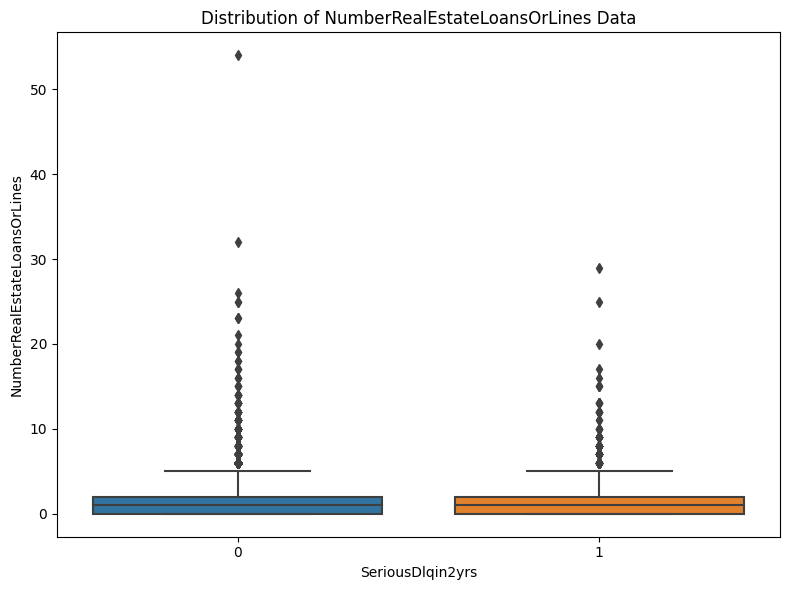

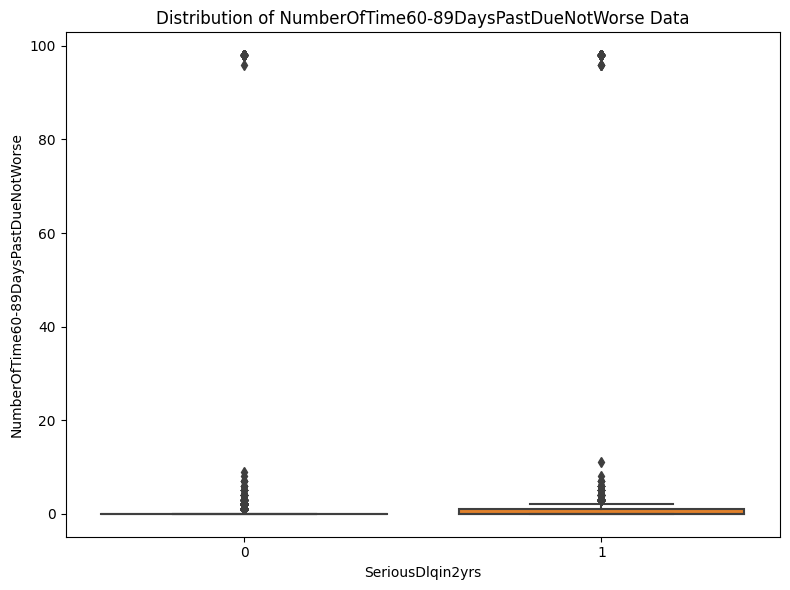

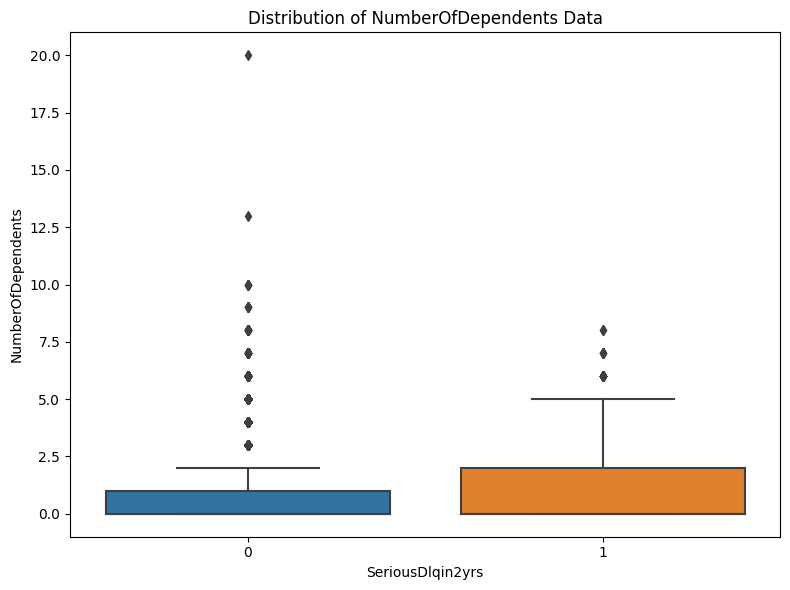

In [15]:
for i,col in enumerate(credit_data.columns,1):
    plt.figure(figsize=(8,6))
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(data=credit_data, x="SeriousDlqin2yrs", y=col)
    plt.tight_layout()
    plt.show()
    

In [30]:
credit_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

### Data Preprocessing

In [31]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [18]:
credit_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [19]:
credit_data[credit_data['MonthlyIncome'].isnull()]['SeriousDlqin2yrs'].value_counts()

0    28062
1     1669
Name: SeriousDlqin2yrs, dtype: int64

In [70]:
credit_data.fillna(0, inplace=True)

Error processing variable age: 'float' object is not callable
Variable: RevolvingUtilizationOfUnsecuredLines
Stats Binning:                                      [intervalStart intervalEnd)  nsamples  \
RevolvingUtilizationOfUnsecuredLines                                         
0                                              -inf        275.0  149785.0   
1                                             275.0       3825.0     147.0   
2                                            3825.0       8497.0      46.0   
3                                            8497.0          inf      22.0   

                                         bads  bad_rate  dist_obs  dist_bads  \
RevolvingUtilizationOfUnsecuredLines                                           
0                                     10016.0  0.066869  0.998567   0.999003   
1                                         8.0  0.054422  0.000980   0.000798   
2                                         2.0  0.043478  0.000307   0.000199   
3      

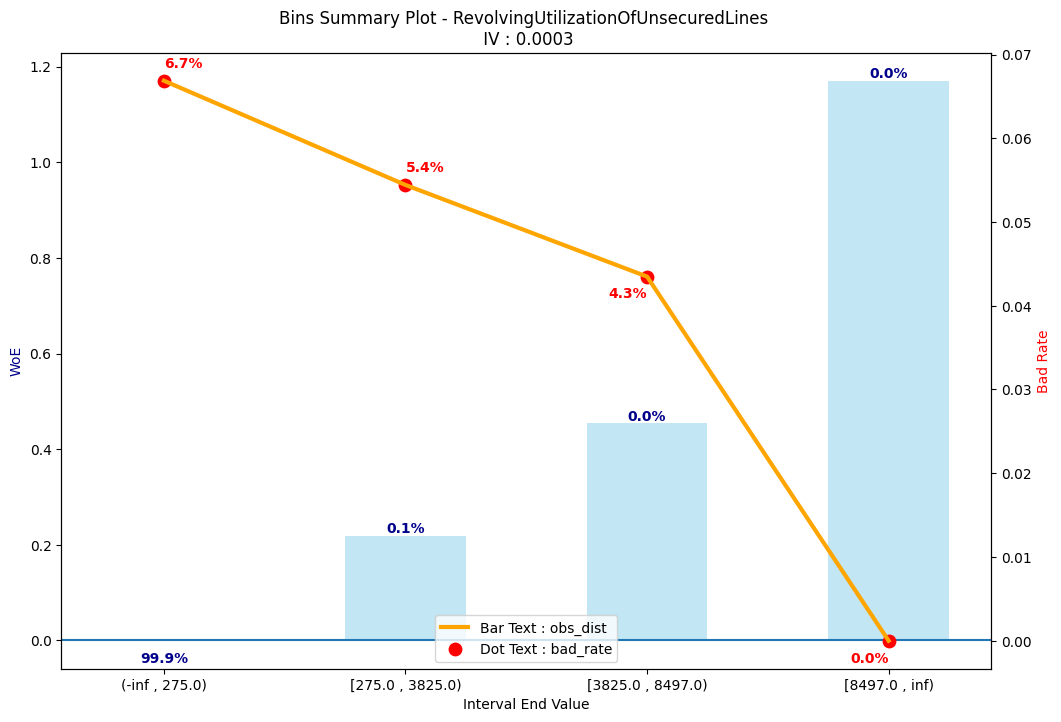


Variable: NumberOfTime30-59DaysPastDueNotWorse
Stats Binning:                                      [intervalStart intervalEnd)  nsamples  \
NumberOfTime30-59DaysPastDueNotWorse                                         
0                                              -inf          1.0  126018.0   
1                                               1.0          3.0   20631.0   
2                                               3.0          inf    3351.0   

                                        bads  bad_rate  dist_obs  dist_bads  \
NumberOfTime30-59DaysPastDueNotWorse                                          
0                                     5041.0  0.040002   0.84012   0.502793   
1                                     3628.0  0.175852   0.13754   0.361859   
2                                     1357.0  0.404954   0.02234   0.135348   

                                         goods  dist_goods       woe    iv_grp  
NumberOfTime30-59DaysPastDueNotWorse                                 

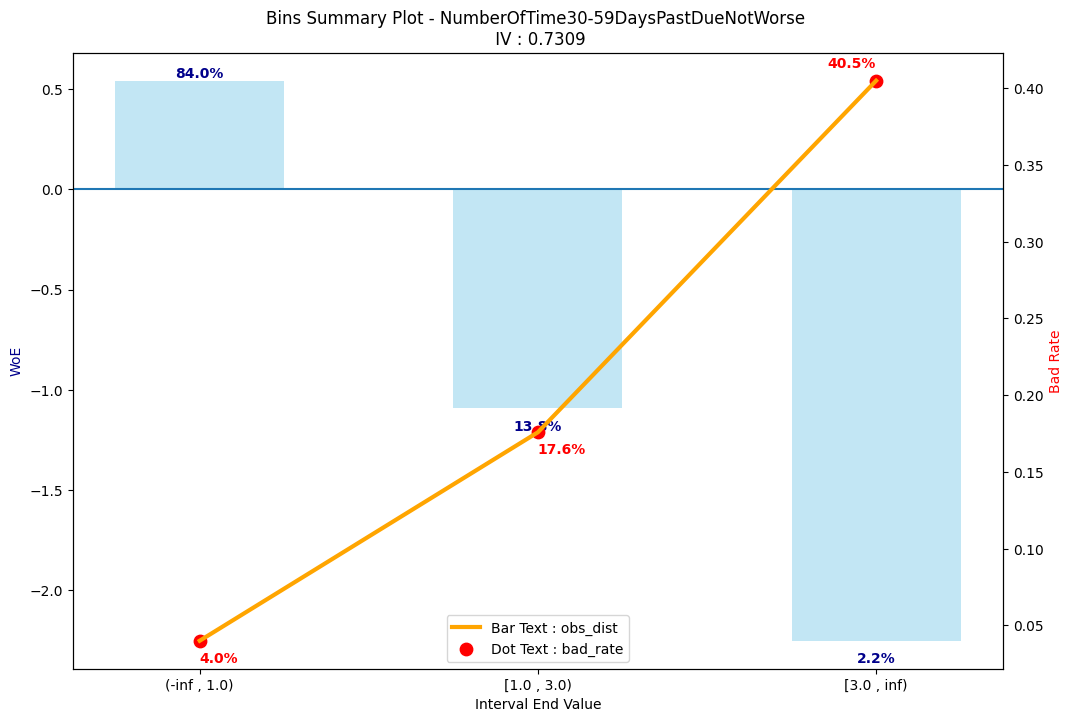


Variable: DebtRatio
Stats Binning:           [intervalStart intervalEnd)  nsamples    bads  bad_rate  dist_obs  \
DebtRatio                                                                     
0                   -inf  3.973377704  119931.0  8368.0  0.069773  0.799540   
1            3.973377704       1123.0   14038.0   872.0  0.062117  0.093587   
2                 1123.0          inf   16031.0   786.0  0.049030  0.106873   

           dist_bads     goods  dist_goods       woe    iv_grp  
DebtRatio                                                       
0           0.834630  111563.0    0.797027 -0.046100  0.001734  
1           0.086974   13166.0    0.094060  0.078329  0.000555  
2           0.078396   15245.0    0.108913  0.328775  0.010033  


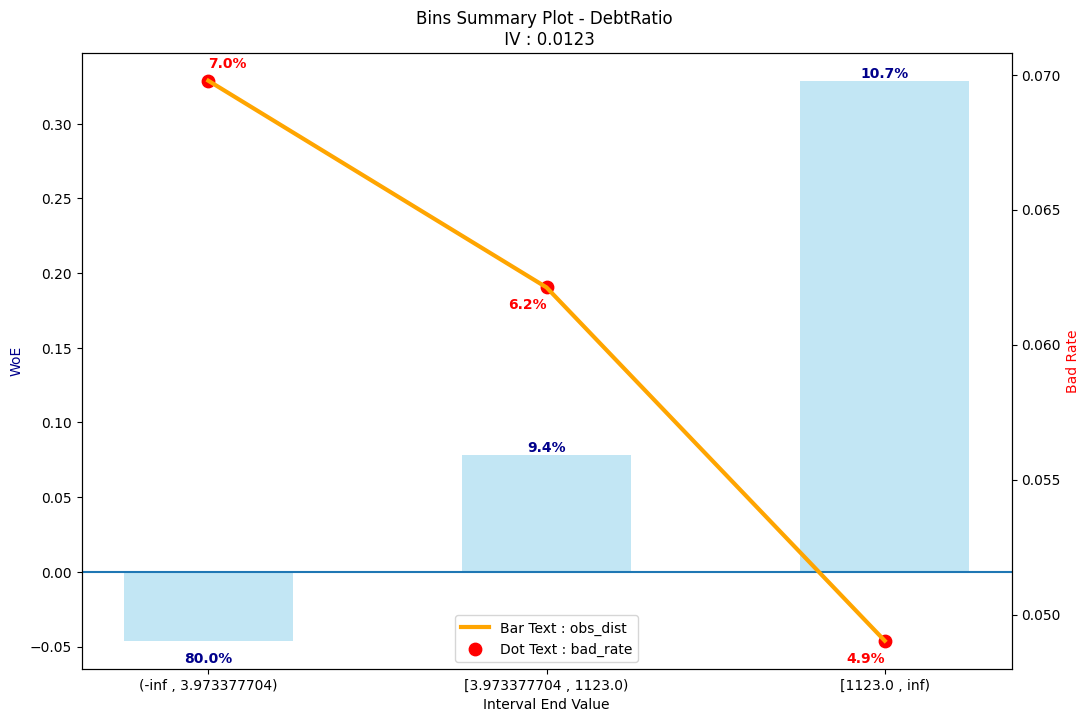


Variable: MonthlyIncome
Stats Binning:               [intervalStart intervalEnd)  nsamples    bads  bad_rate  \
MonthlyIncome                                                           
0                       -inf       5321.0   89054.0  6768.0  0.075999   
1                     5321.0       6597.0   15616.0  1044.0  0.066855   
2                     6597.0       7481.0    8439.0   475.0  0.056286   
3                     7481.0       9832.0   16539.0   857.0  0.051817   
4                     9832.0          inf   20352.0   882.0  0.043337   

               dist_obs  dist_bads    goods  dist_goods       woe  \
MonthlyIncome                                                       
0              0.593693   0.675045  82286.0    0.587866 -0.138280   
1              0.104107   0.104129  14572.0    0.104105 -0.000233   
2              0.056260   0.047377   7964.0    0.056896  0.183097   
3              0.110260   0.085478  15682.0    0.112035  0.270556   
4              0.135680   0.087971

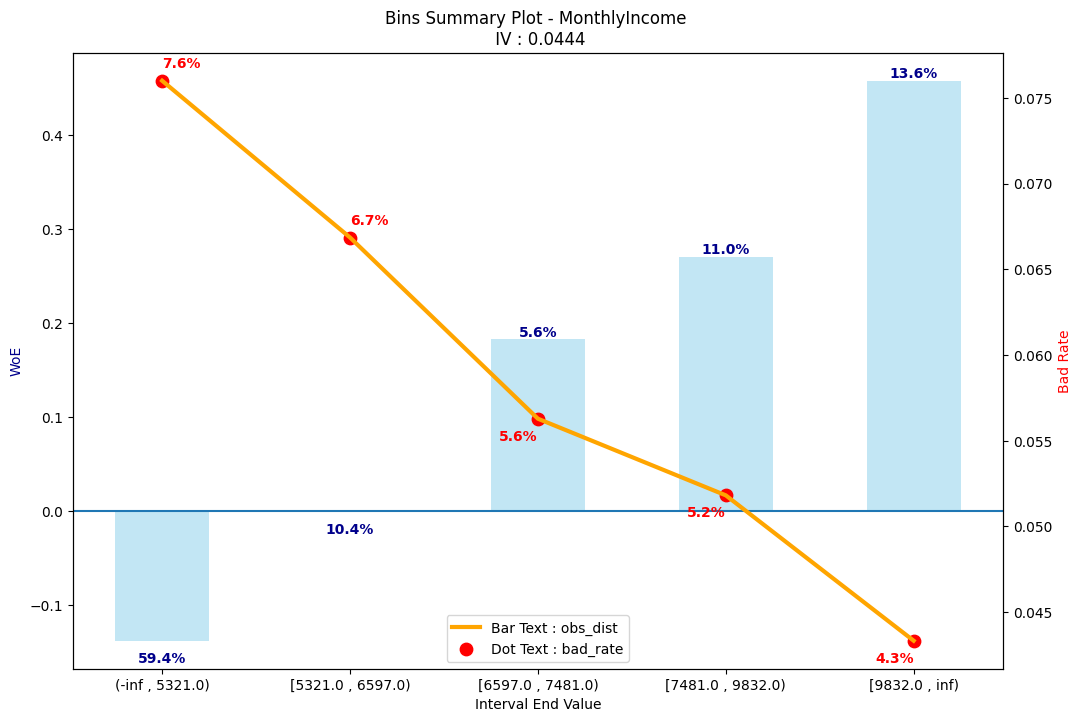


Variable: NumberOfOpenCreditLinesAndLoans
Stats Binning:                                 [intervalStart intervalEnd)  nsamples    bads  \
NumberOfOpenCreditLinesAndLoans                                                 
0                                         -inf          4.0   22050.0  2360.0   
1                                          4.0          5.0   11609.0   743.0   
2                                          5.0          6.0   12931.0   819.0   
3                                          6.0          inf  103410.0  6104.0   

                                 bad_rate  dist_obs  dist_bads    goods  \
NumberOfOpenCreditLinesAndLoans                                           
0                                0.107029  0.147000   0.235388  19690.0   
1                                0.064002  0.077393   0.074107  10866.0   
2                                0.063336  0.086207   0.081688  12112.0   
3                                0.059027  0.689400   0.608817  97306.0   

    

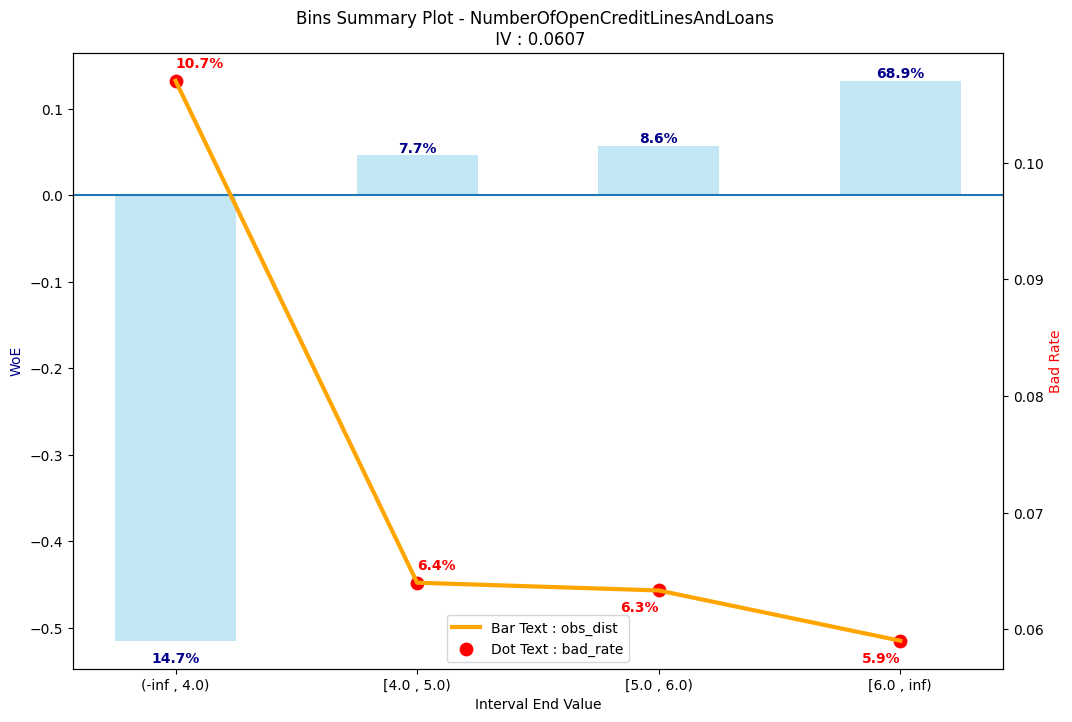


Variable: NumberOfTimes90DaysLate
Stats Binning:                         [intervalStart intervalEnd)  nsamples    bads  \
NumberOfTimes90DaysLate                                                 
0                                 -inf          1.0  141662.0  6554.0   
1                                  1.0          2.0    5243.0  1765.0   
2                                  2.0          3.0    1555.0   776.0   
3                                  3.0          4.0     667.0   385.0   
4                                  4.0          inf     873.0   546.0   

                         bad_rate  dist_obs  dist_bads     goods  dist_goods  \
NumberOfTimes90DaysLate                                                        
0                        0.046265  0.944413   0.653700  135108.0    0.965236   
1                        0.336639  0.034953   0.176042    3478.0    0.024847   
2                        0.499035  0.010367   0.077399     779.0    0.005565   
3                        0.577211  0.0

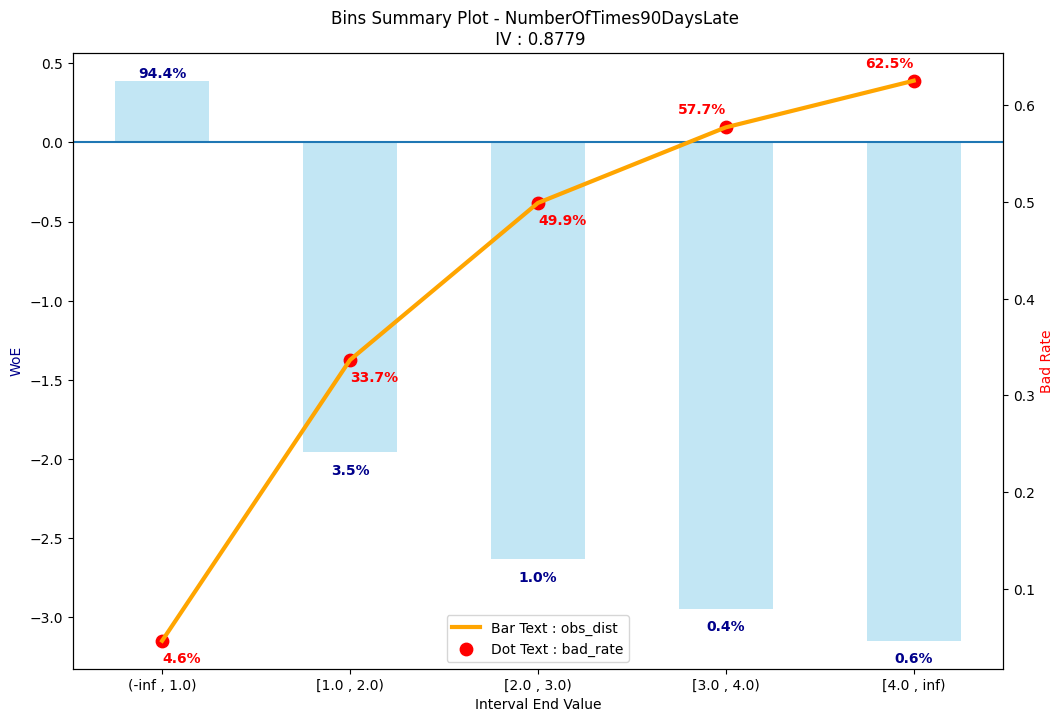


Variable: NumberRealEstateLoansOrLines
Stats Binning:                              [intervalStart intervalEnd)  nsamples    bads  \
NumberRealEstateLoansOrLines                                                 
0                                      -inf          1.0   56188.0  4672.0   
1                                       1.0         32.0   93810.0  5354.0   
2                                      32.0          inf       2.0     0.0   

                              bad_rate  dist_obs  dist_bads    goods  \
NumberRealEstateLoansOrLines                                           
0                             0.083149  0.374587   0.465988  51516.0   
1                             0.057073  0.625400   0.534012  88456.0   
2                             0.000000  0.000013   0.000000      2.0   

                              dist_goods       woe    iv_grp  
NumberRealEstateLoansOrLines                                  
0                               0.368040 -0.235970  0.023113  
1   

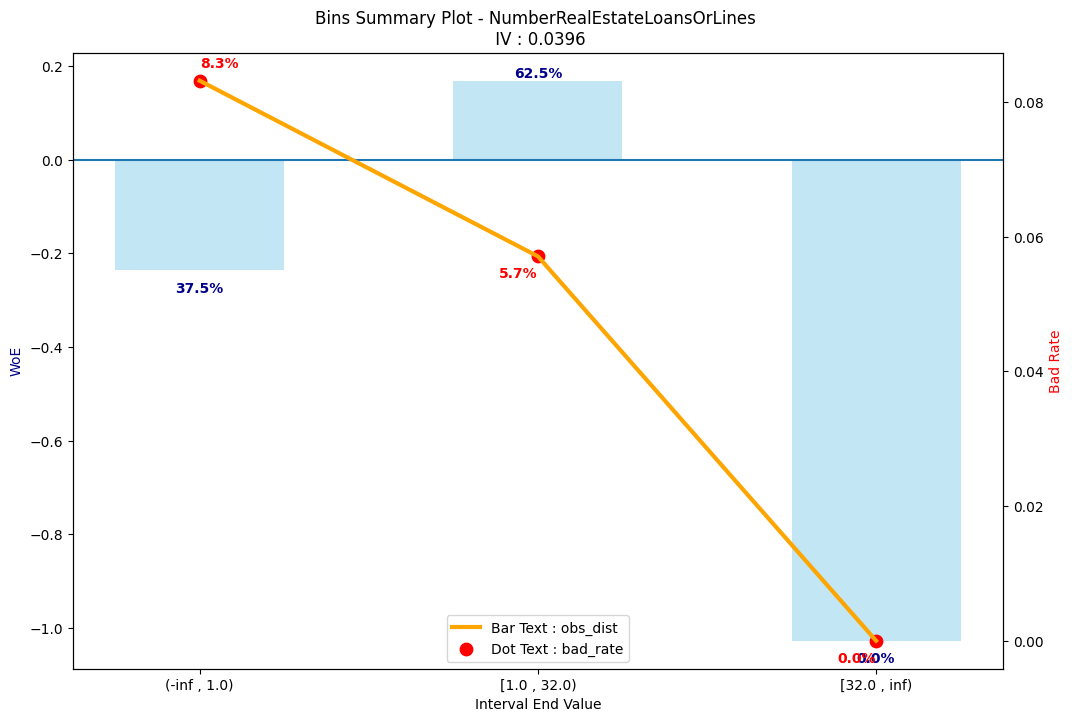


Variable: NumberOfTime60-89DaysPastDueNotWorse
Stats Binning:                                      [intervalStart intervalEnd)  nsamples  \
NumberOfTime60-89DaysPastDueNotWorse                                         
0                                              -inf          1.0  142396.0   
1                                               1.0          2.0    5731.0   
2                                               2.0          3.0    1118.0   
3                                               3.0          4.0     318.0   
4                                               4.0          inf     437.0   

                                        bads  bad_rate  dist_obs  dist_bads  \
NumberOfTime60-89DaysPastDueNotWorse                                          
0                                     7256.0  0.050956  0.949307   0.723718   
1                                     1777.0  0.310068  0.038207   0.177239   
2                                      561.0  0.501789  0.007453   0.05595

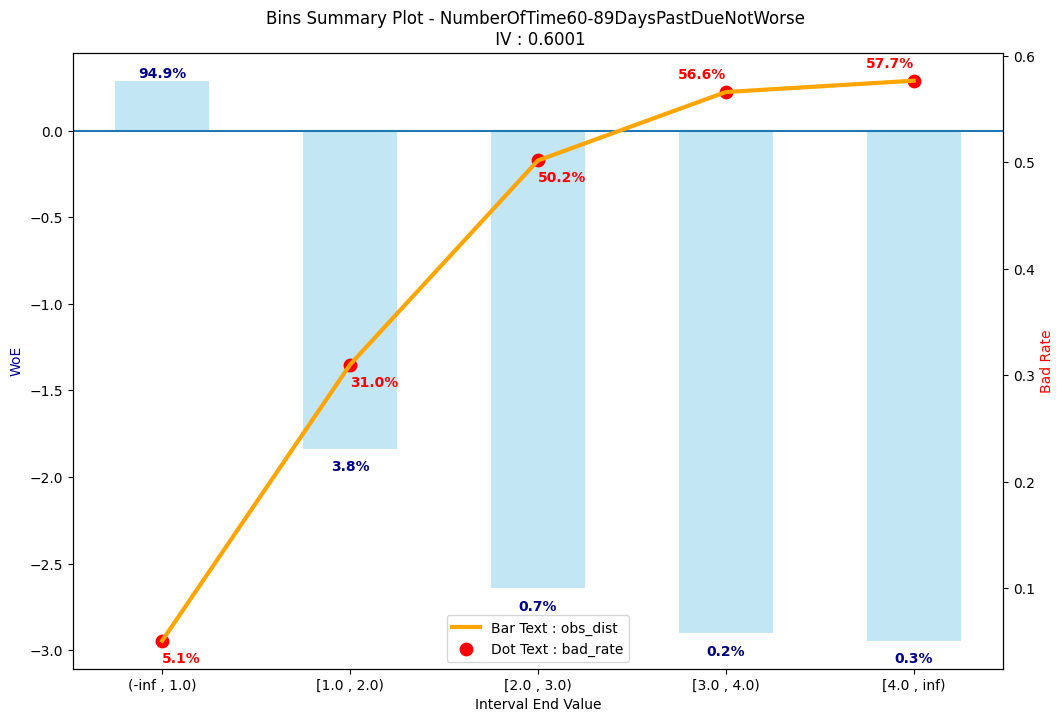


Variable: NumberOfDependents
Stats Binning:                    [intervalStart intervalEnd)  nsamples    bads  bad_rate  \
NumberOfDependents                                                           
0                            -inf          1.0   90826.0  5274.0  0.058067   
1                             1.0          2.0   26316.0  1935.0  0.073529   
2                             2.0          3.0   19522.0  1584.0  0.081139   
3                             3.0          4.0    9483.0   837.0  0.088263   
4                             4.0          6.0    3608.0   365.0  0.101164   
5                             6.0          inf     245.0    31.0  0.126531   

                    dist_obs  dist_bads    goods  dist_goods       woe  \
NumberOfDependents                                                       
0                   0.605507   0.526032  85552.0    0.611199  0.150060   
1                   0.175440   0.192998  24381.0    0.174182 -0.102578   
2                   0.130147   0.1

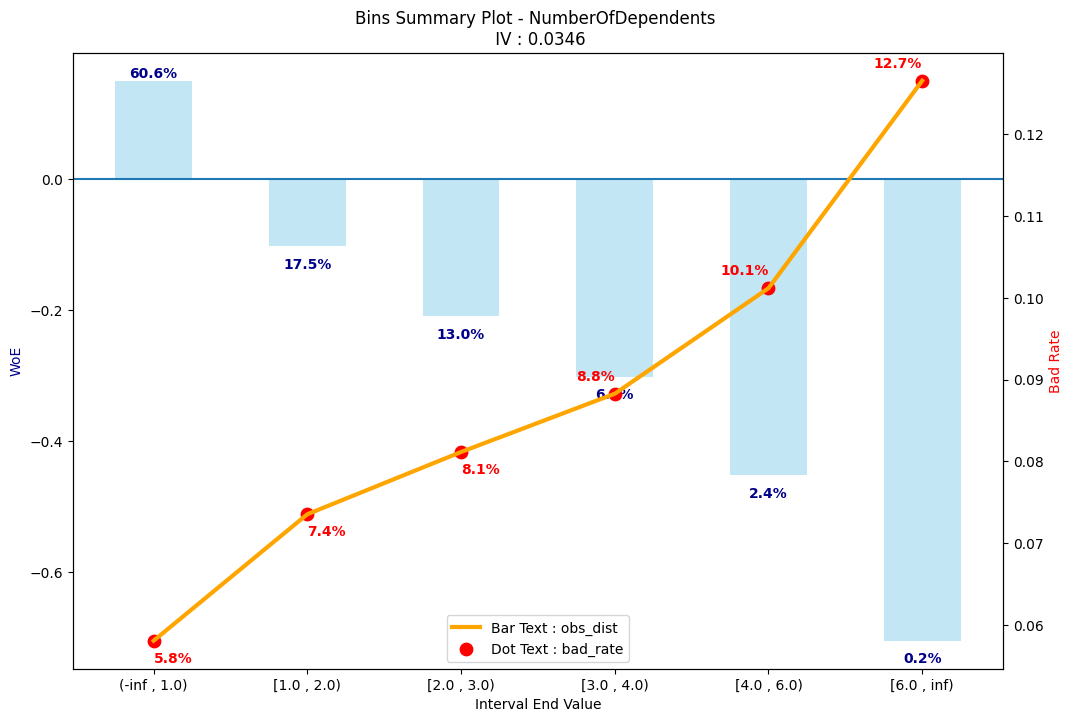

In [154]:
results = {}

# Define the parameters for the binning constraints
binning_constraints = {
    'max_bins': 6,
    'min_bins': 3,
    'max_samples': 0.4,
    'min_samples': 0.1,
    'min_bads': 0.2,
    'init_pvalue': 0.4,
    'maximize_bins': True
}

# Loop through all variables in the DataFrame (excluding the response variable)
response_variable = 'SeriousDlqin2yrs'
for var in credit_data.columns:
    if var != response_variable:  # Exclude the response variable
        try:
            # Initialize the MOB algorithm for the variable
            MOB_ALGO = MOB(data=credit_data, var=var, response=response_variable, exclude_value=None)
            
            # Set the binning constraints
            MOB_ALGO.setBinningConstraints(max_bins = 6, min_bins = 3, 
                                max_samples = 0.4, min_samples = 0.05, 
                                min_bads = 0.05, 
                                init_pvalue = 0.4, 
                                maximize_bins=True)
            
            # Execute the MOB algorithm with different merge methods
            stats_binning = MOB_ALGO.runMOB(mergeMethod='Size')
            
            # Store the results in the dictionary
            results[var] = {
                'StatsBinning': stats_binning
            }
        
        except Exception as e:
            print(f"Error processing variable {var}: {e}")

# Access results for each variable
for var, bins in results.items():
    print(f"Variable: {var}")
    print(f"Stats Binning: {bins['StatsBinning']}")
    MOB_PLOT.plotBinsSummary(monoOptBinTable = bins['StatsBinning'])
    bins['StatsBinning']['Category'] = bins['StatsBinning'].apply(lambda row: f"[{row['[intervalStart']}, {row['intervalEnd)']})", axis=1)

    print()

In [112]:
results['age']['StatsBinning']

,[intervalStart,intervalEnd),nsamples,bads,bad_rate,dist_obs,dist_bads,goods,dist_goods,woe,iv_grp,Category
age,,,,,,,,,,,,
0,-inf,34.0,17085.0,1940.0,0.113550,0.113900,0.193497,15145.0,0.108199,-0.581293,0.049583,"[-inf, 34.0)"
1,34.0,44.0,27424.0,2553.0,0.093094,0.182827,0.254638,24871.0,0.177683,-0.359842,0.027692,"[34.0, 44.0)"
2,44.0,54.0,36509.0,2848.0,0.078008,0.243393,0.284061,33661.0,0.240480,-0.166552,0.007259,"[44.0, 54.0)"
3,54.0,58.0,13941.0,854.0,0.061258,0.092940,0.085179,13087.0,0.093496,0.093168,0.000775,"[54.0, 58.0)"
4,58.0,68.0,31439.0,1300.0,0.041350,0.209593,0.129663,30139.0,0.215319,0.507181,0.043443,"[58.0, 68.0)"
5,68.0,inf,23602.0,531.0,0.022498,0.157347,0.052962,23071.0,0.164823,1.135295,0.126995,"[68.0, inf)"


In [117]:
binned_data = credit_data.copy()

# Loop through each variable in the results dictionary
for var, binning_info in results.items():
    # Extract the binning rules for the current variable
    stats_binning = binning_info['StatsBinning']
    
    # Extract the bin edges and labels from the binning rules
    bin_edges = stats_binning['[intervalStart'].tolist() + [stats_binning['intervalEnd)'].iloc[-1]]  # This should be a list of bin edges
    bin_edges = [float(x) if isinstance(x, str) else x for x in bin_edges]
    
    # Replace 'inf' and '-inf' with np.inf and -np.inf
    bin_edges = [np.inf if x == 'inf' else -np.inf if x == '-inf' else x for x in bin_edges]
    bin_labels = stats_binning['Category']  # This should be a list of bin labels
    
    # Use pd.cut to map the continuous values to bins
    binned_data[f'{var}_binned'] = pd.cut(binned_data[var], bins=bin_edges, labels=bin_labels, right=False)
    
    woe_values = stats_binning['woe']
    
    # Create a mapping from bin labels to WOE values
    woe_mapping = dict(zip(bin_labels, woe_values))
    
    binned_data[f'{var}_woe'] = binned_data[f'{var}_binned'].map(woe_mapping)

# Now binned_data contains the original data along with the binned versions of the variables
display(binned_data.head())

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,NumberOfOpenCreditLinesAndLoans_binned,NumberOfOpenCreditLinesAndLoans_woe,NumberOfTimes90DaysLate_binned,NumberOfTimes90DaysLate_woe,NumberRealEstateLoansOrLines_binned,NumberRealEstateLoansOrLines_woe,NumberOfTime60-89DaysPastDueNotWorse_binned,NumberOfTime60-89DaysPastDueNotWorse_woe,NumberOfDependents_binned,NumberOfDependents_woe
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"[6.0, inf)",0.132641,"[-inf, 1.0)",0.389724,"[1.0, 32.0)",0.168386,"[-inf, 1.0)",0.288208,"[2.0, 3.0)",-0.209307
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"[4.0, 5.0)",0.046423,"[-inf, 1.0)",0.389724,"[-inf, 1.0)",-0.235970,"[-inf, 1.0)",0.288208,"[1.0, 2.0)",-0.102578
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"[2.0, 3.0)",-0.339123,"[1.0, 2.0)",-1.957968,"[-inf, 1.0)",-0.235970,"[-inf, 1.0)",0.288208,"[-inf, 1.0)",0.150060
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"[5.0, 6.0)",0.057593,"[-inf, 1.0)",0.389724,"[-inf, 1.0)",-0.235970,"[-inf, 1.0)",0.288208,"[-inf, 1.0)",0.150060
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"[6.0, inf)",0.132641,"[-inf, 1.0)",0.389724,"[1.0, 32.0)",0.168386,"[-inf, 1.0)",0.288208,"[-inf, 1.0)",0.150060


In [118]:
results['age']['StatsBinning']

,[intervalStart,intervalEnd),nsamples,bads,bad_rate,dist_obs,dist_bads,goods,dist_goods,woe,iv_grp,Category
age,,,,,,,,,,,,
0,-inf,34.0,17085.0,1940.0,0.113550,0.113900,0.193497,15145.0,0.108199,-0.581293,0.049583,"[-inf, 34.0)"
1,34.0,44.0,27424.0,2553.0,0.093094,0.182827,0.254638,24871.0,0.177683,-0.359842,0.027692,"[34.0, 44.0)"
2,44.0,54.0,36509.0,2848.0,0.078008,0.243393,0.284061,33661.0,0.240480,-0.166552,0.007259,"[44.0, 54.0)"
3,54.0,58.0,13941.0,854.0,0.061258,0.092940,0.085179,13087.0,0.093496,0.093168,0.000775,"[54.0, 58.0)"
4,58.0,68.0,31439.0,1300.0,0.041350,0.209593,0.129663,30139.0,0.215319,0.507181,0.043443,"[58.0, 68.0)"
5,68.0,inf,23602.0,531.0,0.022498,0.157347,0.052962,23071.0,0.164823,1.135295,0.126995,"[68.0, inf)"


In [121]:
binned_data[['age','age_binned','age_woe']]

,age,age_binned,age_woe
1,45,"[44.0, 54.0)",-0.166552
2,40,"[34.0, 44.0)",-0.359842
3,38,"[34.0, 44.0)",-0.359842
4,30,"[-inf, 34.0)",-0.581293
5,49,"[44.0, 54.0)",-0.166552
...,...,...,...
149996,74,"[68.0, inf)",1.135295
149997,44,"[44.0, 54.0)",-0.166552
149998,58,"[58.0, 68.0)",0.507181
149999,30,"[-inf, 34.0)",-0.581293


In [123]:
binned_data = binned_data[[col for col in binned_data.columns if col.endswith('_woe')]]

In [125]:
binned_data['SeriousDlqin2yrs'] = credit_data['SeriousDlqin2yrs']

In [420]:
train, test = train_test_split(binned_data, test_size=0.3,random_state=31122024)
train.reset_index(inplace=True, drop= True)
test.reset_index(inplace=True, drop= True)
train_target = train.pop('SeriousDlqin2yrs')
test_target = test.pop('SeriousDlqin2yrs')

In [421]:
clf=LogisticRegression(solver='liblinear')
clf.fit(train,train_target)

LogisticRegression(solver='liblinear')

In [422]:
y_pred=clf.predict(test)
print(classification_report(test_target,y_pred))
roc_auc_score(test_target,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     42022
           1       0.57      0.18      0.27      2978

    accuracy                           0.94     45000
   macro avg       0.76      0.58      0.62     45000
weighted avg       0.92      0.94      0.92     45000



0.5830379823750896

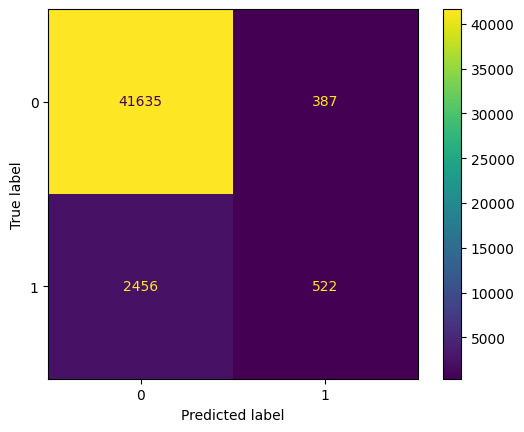

In [423]:
cm_log=confusion_matrix(test_target,y_pred,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=clf.classes_)
disp.plot()

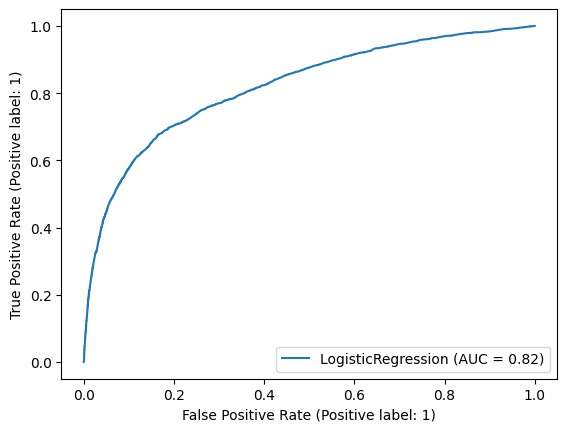

In [424]:
svc_disp = RocCurveDisplay.from_estimator(clf, test, test_target)
plt.show()

In [425]:
train, test = train_test_split(credit_data, test_size=0.3,random_state=31122024)
train.reset_index(inplace=True, drop= True)
test.reset_index(inplace=True, drop= True)
train_target = train.pop('SeriousDlqin2yrs')
test_target = test.pop('SeriousDlqin2yrs')


In [426]:
weights = {0:1, 1:10} 

In [427]:
forest=RandomForestClassifier(n_estimators=20,random_state=31122024, class_weight = weights, max_depth=6)
forest=forest.fit(train,train_target)

In [428]:
feature_names=train.columns
feature_importance_forest=pd.DataFrame(forest.feature_importances_,index=feature_names)
feature_importance_forest[0].nlargest(10)

RevolvingUtilizationOfUnsecuredLines    0.303315
NumberOfTimes90DaysLate                 0.276841
NumberOfTime30-59DaysPastDueNotWorse    0.241910
NumberOfTime60-89DaysPastDueNotWorse    0.102032
age                                     0.035589
NumberOfOpenCreditLinesAndLoans         0.016152
DebtRatio                               0.008559
NumberRealEstateLoansOrLines            0.007723
MonthlyIncome                           0.006024
NumberOfDependents                      0.001856
Name: 0, dtype: float64

In [429]:
predictions=forest.predict(test)
np.bincount(predictions)
print(classification_report(y_true=test_target,y_pred=predictions,target_names=['No Serious Delinquencies','Serious Delinquencies']))
roc_auc_score(test_target,predictions)

                          precision    recall  f1-score   support

No Serious Delinquencies       0.97      0.88      0.93     42022
   Serious Delinquencies       0.28      0.65      0.39      2978

                accuracy                           0.87     45000
               macro avg       0.63      0.77      0.66     45000
            weighted avg       0.93      0.87      0.89     45000



0.7654876819615962

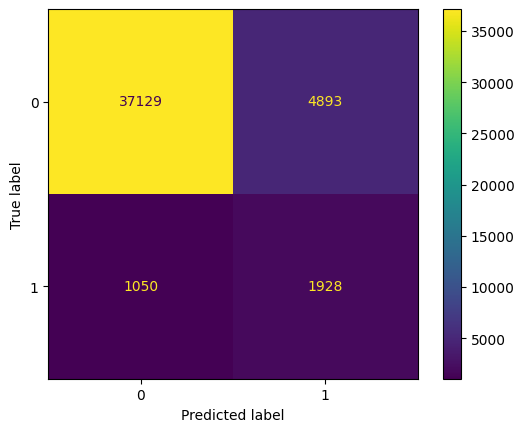

In [430]:
cm=confusion_matrix(test_target,predictions,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
disp.plot()

In [431]:
rf_grid = RandomForestClassifier(random_state=31122024, class_weight=weights)
gr_space = {
    'max_depth': [5,7,10],
    'n_estimators': [20, 30],
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='roc_auc', verbose = 3)
model_grid = grid.fit(train, train_target)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ......max_depth=5, n_estimators=20;, score=0.860 total time=   0.5s
[CV 2/3] END ......max_depth=5, n_estimators=20;, score=0.856 total time=   0.5s
[CV 3/3] END ......max_depth=5, n_estimators=20;, score=0.857 total time=   0.6s
[CV 1/3] END ......max_depth=5, n_estimators=30;, score=0.860 total time=   0.9s
[CV 2/3] END ......max_depth=5, n_estimators=30;, score=0.857 total time=   0.9s
[CV 3/3] END ......max_depth=5, n_estimators=30;, score=0.858 total time=   0.9s
[CV 1/3] END ......max_depth=7, n_estimators=20;, score=0.860 total time=   0.8s
[CV 2/3] END ......max_depth=7, n_estimators=20;, score=0.859 total time=   0.8s
[CV 3/3] END ......max_depth=7, n_estimators=20;, score=0.859 total time=   0.8s
[CV 1/3] END ......max_depth=7, n_estimators=30;, score=0.861 total time=   1.3s
[CV 2/3] END ......max_depth=7, n_estimators=30;, score=0.859 total time=   1.3s
[CV 3/3] END ......max_depth=7, n_estimators=30;,

In [432]:
rf_optimized = model_grid.best_estimator_

In [433]:
predictions=rf_optimized.predict(test)
np.bincount(predictions)
print(classification_report(y_true=test_target,y_pred=predictions,target_names=['No Serious Delinquencies','Serious Delinquencies']))
roc_auc_score(test_target,predictions)

                          precision    recall  f1-score   support

No Serious Delinquencies       0.97      0.87      0.92     42022
   Serious Delinquencies       0.27      0.67      0.38      2978

                accuracy                           0.86     45000
               macro avg       0.62      0.77      0.65     45000
            weighted avg       0.93      0.86      0.88     45000



0.7701318401800407

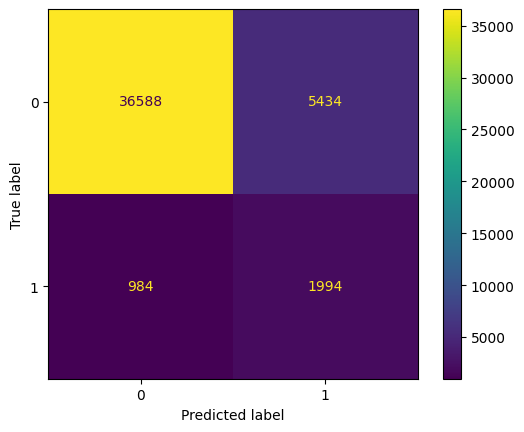

In [434]:
cm=confusion_matrix(test_target,predictions,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
disp.plot()

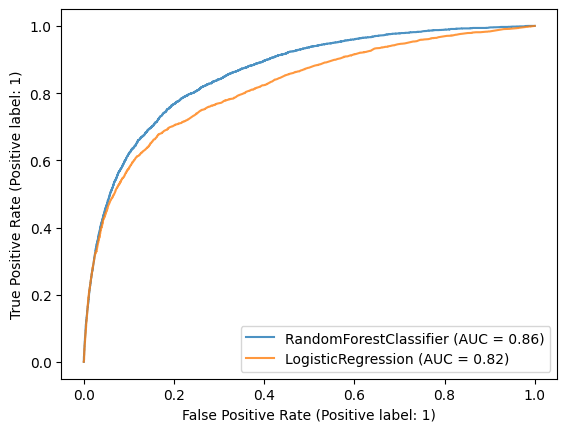

In [435]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf_optimized, test, test_target, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [436]:
# Create the SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_optimized)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(test)

In [437]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: [0.58217783 0.41782217]


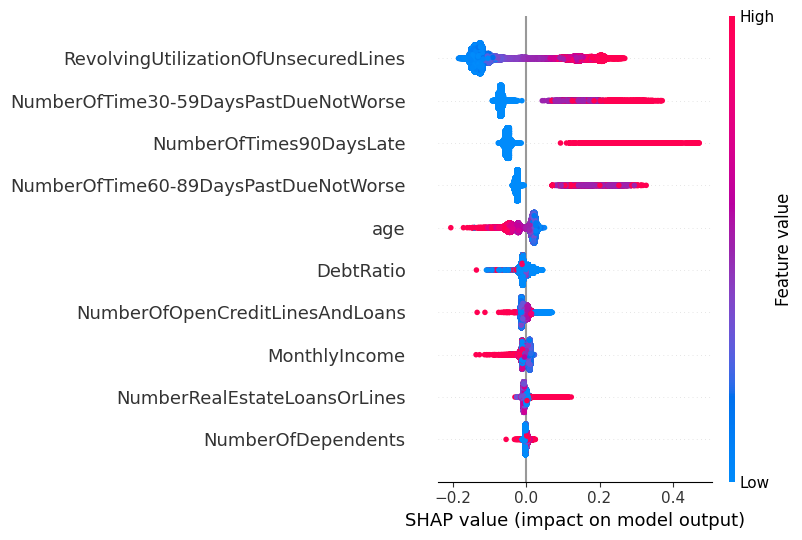

In [438]:
shap.summary_plot(shap_values[:,:,1], test)

In [439]:
shap_values.shape

(45000, 10, 2)

In [440]:
test.sample(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
26552,0.338188,40,0,0.189332,2455.0,5,0,0,0,0.0
42361,0.296519,57,0,3295.000000,0.0,13,0,1,0,2.0
16039,0.858949,32,2,0.157109,3417.0,2,2,0,0,3.0
16126,0.004248,65,0,1062.000000,0.0,12,0,1,0,0.0
42112,0.897797,48,3,0.173239,6516.0,13,1,1,0,1.0
20697,1.000000,35,0,0.474339,4500.0,6,1,2,0,1.0
37990,0.054992,33,0,7511.000000,0.0,4,0,2,0,0.0
7412,0.383206,41,0,694.000000,0.0,4,0,0,0,0.0
33314,0.000000,86,0,0.482164,7596.0,10,0,2,0,1.0
38694,0.109951,56,0,0.264998,6750.0,10,0,1,0,0.0


In [447]:
test_target.loc[42361]

0

In [442]:
test_target[test_target==1]

53       1
85       1
104      1
107      1
118      1
        ..
44972    1
44973    1
44987    1
44993    1
44994    1
Name: SeriousDlqin2yrs, Length: 2978, dtype: int64

In [454]:
shap.initjs()
# Generate a SHAP force plot for an individual prediction
shap.force_plot(explainer.expected_value[1], shap_values[:,:,1][53], test.loc[53])

In [455]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[:,:,1][26552], test.loc[26552])

In [456]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[:,:,1][42361], test.loc[42361])

In [457]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[:,:,1][44972], test.loc[44972])